<div class = "alert alert-warning">
Ce fichier  est un notebook Python.

Il comporte deux types de cellules :

* les cellules d'édition dans lesquelles vous pouvez saisir du texte éventuellement enrichi de mises en formes ou de liens hypertextes avec la syntaxe du langage HTML simplifié qui s'appelle Markdown. Voir http://daringfireball.net/projects/markdown/ pour la syntaxe de Markdown.

* les cellules de code où l'on peut saisir du code Python3 puis le faire exécuter avec la combinaison de touches `CTRL + RETURN`

Une cellule peut être éditée  de deux façons différentes :

* en mode _commande_ lorsqu'on clique sur sa marge gauche qui est surlignée alors en bleu, on peut alors  :

    - changer le type de la cellule en appuyant sur `m` pour passer en cellule Markdown ou sur `y` pour passer en cellule de code
    
    - insérer une cellule juste au-dessus en appuyant sur `a`
    
    - insérer une cellule juste en-dessous en appuyant sur `b`
    
    - couper la cellule en appuyant sur `x` etc ...
    
* en mode _édition_ lorsqu'on clique sur l'intérieur de la cellule.

L'aide complète sur les raccourcis claviers est accessible depuis le bouton `Help` dans la barre d'outils ci-dessus.
<div>

# Outils pour l'affichage



In [193]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

def dimensions(pix):
    """Retourne les dimensions (Largeur, Hauteur) d'une matrice
    de pixels"""
    return len(pix[0]), len(pix) 


def laby_to_image(pix_source, mode = '1', fichier='image.png', res=1):
    """Convertit en image  une matrice de pixels pix 
    de dimensions (ligne, colonnes)=(nline, ncol)
    en représentant sur l'écran chaque case de pix
    par un carré de coté resolution pixels.
    Le mode de l'image peut être :
    '1'  : binaire 0 ou 1
    'L' : niveaux de gris entre 0 et 255
    'RGB' : triplet de valeurs (Rouge, Vert, Bleu) entre 0 et 255
    """
    #on force la conversion en type np.uint8 si pix est un tableau numpy
    pix = deepcopy(pix_source)
    if isinstance(pix, np.ndarray):
        pix = pix.astype(np.uint8)
    #précondition 1 : list doit être une matrice de pixels
    precondition1 = isinstance(pix, (list, np.ndarray)) \
                   and len(pix) > 0 \
                and all(isinstance(pix[k], (list, np.ndarray)) \
                        and  len(pix[k]) == len(pix[0])  \
                        for k in range(len(pix)))
    assert precondition1, "Il faut passer en paramètre une matrice de pixels"
    #dimensions de la matrice de pixels
    largeur_pix, hauteur_pix = dimensions(pix)
    #transformations des pixels : 0,2,3  -> 1 et 1 -> 0
    for i in range(hauteur_pix):
        for j in range(largeur_pix):
            if pix[i][j] in [0, 2,3]:
                pix[i][j] = 1
            else:
                pix[i][j] = 0
    #préconditions sur la matrice de pixels pour respecter les contraintes du mode de l'image 
    precondition2 =  mode == '1' and \
                    all(isinstance(pix[y][x], (int, np.uint8)) and 0 <= pix[y][x] <= 1 \
                        for y in range(hauteur_pix) for x in range(largeur_pix))
    precondition3 =  mode == 'L' and \
                    all(isinstance(pix[y][x], (int, np.uint8)) and 0 <= pix[y][x] <= 255 \
                        for y in range(hauteur_pix) for x in range(largeur_pix))
    precondition4 = mode == 'RGB' and \
                    all(isinstance(pix[y][x], (list, np.ndarray)) \
                        and len(pix[y][x]) == 3 \
                        and  all(isinstance(pix[y][x][k], (int, np.uint8)) \
                                 and 0 <= pix[y][x][k] <= 255 \
                            for k in range(3)) \
                        for y in range(hauteur_pix) for x in range(largeur_pix))
    assert precondition2 or precondition3 or precondition4, "matrice de pixels et mode incompatibles !"    
    #dimensions de la matrice de pixels
    hauteur_newpix, largeur_newpix = res * hauteur_pix, res * largeur_pix
    #copie de pix sous forme de tableau numpy agrandi d'un coefficient res 
    if mode != 'RGB':
        newpix =  np.zeros((hauteur_newpix, largeur_newpix), dtype='uint8')
    else:
        newpix =  np.zeros((hauteur_newpix, largeur_newpix, 3), dtype='uint8')
    #initialsation des blocs de taille res * res de newpix
    #avec des 0 si pix[i][j] == 0 et 1 sinon
    for y in range(hauteur_newpix):
        for x in range(largeur_newpix):
            ypix = y // res
            xpix = x // res
            newpix[y][x] = pix[ypix][xpix]   
    if mode != 'RGB':
        #création d'un objet image PIL en mode binaire (pixel de valeur 0 ou 1)
        im = Image.new(mode, (largeur_newpix, hauteur_newpix))  #Image.new(mode, (Largeur, Hauteur))  
        #on remplit l'image avec les valeurs de newpix
        im.putdata(newpix.flatten())
    else:
        im = Image.fromarray(newpix)
    #enregistrement de l'image sur le disque
    im.save(fichier)
    #affichage de l'image
    #plt.axis('off') #to disable xticks and yticks
    #cas des images binaires 
    if mode == '1':
        plt.imshow(newpix,cmap=plt.cm.gray, vmin= 0, vmax = 1)
    # cas des images en niveaux de gris
    elif mode == 'L':
        plt.imshow(newpix,cmap=plt.cm.gray, vmin= 0, vmax = 255)
    #cas des images RGB
    else:
        plt.imshow(newpix)
        
def image_to_laby(fichier):
    #ouverture de l'image avec PIL
    im = Image.open(fichier)
    #conversion de l'image en matrice de pixels / tableau numpy
    pix = np.array(im, dtype = np.uint8)
    #conversion de la matrice de pixels en liste Python
    pix = pix.tolist()
    return pix

def laby_vide(ncol, nlig, mode):
    """Retourne une matrice de pixels de n lignes et m colonnes
    représentant une image noire dans le mode  d'image choisi"""
    assert mode in ['1', 'L', 'RGB'], "mode doit appartenir à ['1', 'L', 'RGB']"
    if mode in ['1', 'L']:
        return [[0 for x in range(ncol)] for y in range(nlig)]
    else:               
        return [[[0,0,0] for x in range(ncol)] for y in range(nlig)]

# Exercice 4

![laby](exo4_laby.png)

### Question 1

Les labyrinthes : 

In [194]:
lab1 = [ [1,1,1,1,1,0,0,0,0,0,1],
       [1,0,0,0,1,0,1,0,1,0,1],
       [1,0,1,0,1,0,1,0,1,0,1],
       [1,0,1,0,1,0,1,0,1,0,1],
       [1,0,1,0,1,0,1,0,1,0,1],
       [2,0,1,0,0,0,1,0,1,0,3],
       [1,1,1,1,1,1,1,0,1,0,1],
       [1,0,1,0,1,0,1,1,1,0,1],
       [1,0,0,0,1,0,0,0,1,0,1],
       [1,0,1,1,1,0,1,0,0,0,1],
       [1,0,0,0,0,0,1,1,0,1,1]  
       ]

In [195]:
lab2 = [[1, 1, 1, 1, 1, 1, 1],
[1, 0, 0, 0, 0, 0, 1],
[1, 1, 1, 1, 1, 0, 1],
[1, 0, 1, 0, 0, 0, 1],
[1, 0, 1, 0, 1, 0, 1],
[1, 0, 0, 0, 1, 0, 1],
[1, 1, 1, 1, 1, 3, 1]]

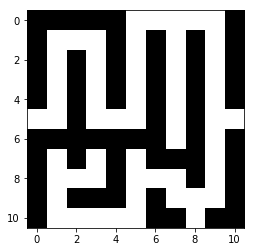

In [196]:
laby_to_image(lab1)

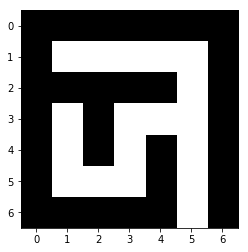

In [197]:
laby_to_image(lab2)

### Réponse à la question 1

Correction du codage de l'entrée, __codez votre réponse dans la cellule ci-dessous.__

In [198]:
# saisir votre code ici
lab2[1][0] = 2

In [199]:
#test
assert lab2 == [[1, 1, 1, 1, 1, 1, 1],
 [2, 0, 0, 0, 0, 0, 1],
 [1, 1, 1, 1, 1, 0, 1],
 [1, 0, 1, 0, 0, 0, 1],
 [1, 0, 1, 0, 1, 0, 1],
 [1, 0, 0, 0, 1, 0, 1],
 [1, 1, 1, 1, 1, 3, 1]]
print("Tests réussis")

Tests réussis


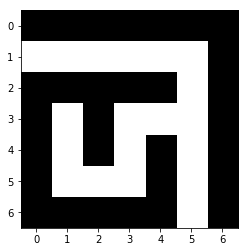

In [200]:
laby_to_image(lab2)

## Question 2

Écrire une fonction est_valide(i, j, n, m) qui renvoie True si le couple (i,j) correspond à des coordonnées valides pour un labyrinthe de taille (n,m), et False sinon.
On donne ci-dessous des exemples d'appels.

~~~python
>>> est_valide(5, 2, 10, 10)
True
>>> est_valide(-3, 4, 10, 10)
False
~~~

### Réponse à la question 2

__Codez votre réponse dans la cellule ci-dessous.__

In [201]:
# saisir votre code ici
def est_valide(i, j, n, m):
    return 0 <= i < n and 0 <= j < m

In [202]:
#Tests unitaires
assert est_valide(5, 2, 10, 10) == True
assert est_valide(-3, 4, 10, 10) == False
print("Tests réussis")

Tests réussis


## Question 3

On suppose que le départ d'un labyrinthe est toujours indiqué, mais on ne fait aucune
supposition sur son emplacement. Compléter la fonction depart(lab)ci-dessous de sorte
qu'elle renvoie, sous la forme d'un tuple, les coordonnées du départ d'un labyrinthe
(représenté par le paramètre lab). Par exemple, l'appel depart(lab1) doit renvoyer le
tuple (5, 0).



### Réponse à la question 3

__Codez votre réponse dans la cellule ci-dessous.__

In [203]:
# saisir votre code ici
def depart(lab):
    n = len(lab)
    m = len(lab[0])
    for i in range(n):
        for j in range(m):
            if lab[i][j] == 2:
                return (i, j)

In [204]:
# tests unitaires
assert depart(lab1) == (5, 0)
assert depart(lab2) == (1, 0)
print("Tests réussis")

Tests réussis


## Question 4

Écrire une fonction nb_cases_vides(lab) qui renvoie le nombre de cases vides d'un
labyrinthe (comprenant donc l'arrivée et le départ).
Par exemple, l'appel nb_cases_vides(lab2) doit renvoyer la valeur 19.

### Réponse à la question 4

__Codez votre réponse dans la cellule ci-dessous.__

In [205]:
# saisir votre code ici
def nb_cases_vides(lab):
    c = 0
    n = len(lab)
    m = len(lab[0])
    for i in range(n):
        for j in range(m):
            if lab[i][j] != 1:
                c = c + 1
    return c

In [206]:
# tests unitaires
assert nb_cases_vides(lab1) == 58
assert nb_cases_vides(lab2) == 19
print("Tests réussis")

Tests réussis


## Partie B : Recherche d’une solution dans un labyrinthe
    
    
On suppose dans cette partie que les labyrinthes possèdent un unique chemin allant du départ
à l’arrivée sans repasser par la même case. Dans la suite, c’est ce chemin que l’on appellera
solution du labyrinthe.
Pour déterminer la solution d'un labyrinthe, on parcourt les cases vides de proche en proche.
Lors d’un tel parcours, afin d’éviter de tourner en rond, on choisit de marquer les cases visitées.
Pour cela, on remplace la valeur d'une case visitée dans le tableau représentant le labyrinthe
par la valeur 4.

## Question 1

On dit que deux cases d'un labyrinthe sont voisines si elles ont un côté commun.
On considère une fonction voisines(i, j, lab) qui prend en arguments deux entiers ݅
et ݆ représentant les coordonnées d’une case et un tableau lab qui représente un labyrinthe.
Cette fonction renvoie la liste des coordonnées des cases voisines de la case de
coordonnées (i, j) qui sont valides, non visitées et qui ne sont pas des murs. L'ordre des
éléments de cette liste n'importe pas.
Ainsi, l'appel `voisines(1, 1, [[1, 1, 1], [4, 0, 0], [1, 0, 1]])` renvoie la
liste [(2, 1), (1, 2)].
Que renvoie l'appel `voisines(1, 2, [[1, 1, 4], [0, 0, 0], [1, 1, 0]])` ?

### Réponse à la question 1

Saisir votre réponse ici.

`voisines(1, 2, [[1, 1, 4], [0, 0, 0], [1, 1, 0]])` renvoie la liste `[(1,1), (2,2)]`

### Complément : codez une fonction voisines

__Saisir votre réponse ci-dessous.__

In [207]:
def voisines(i, j, lab):
    n = len(lab)
    m = len(lab[0])
    liste_voisines = []
    for (vi, vj) in [(i,j-1), (i+1, j), (i, j+1), (i-1, j)]:
        if est_valide(vi, vj, n, m) and (lab[vi][vj] == 0 or lab[vi][vj] == 3):
            liste_voisines.append((vi, vj))
    return liste_voisines

In [208]:
# test unitaire
assert voisines(1, 1, [[1, 1, 1], [4, 0, 0], [1, 0, 1]]) ==  [(2, 1), (1, 2)]
print("Test réussi")

Test réussi


## Question 2


On souhaite stocker la solution dans une liste chemin. Cette liste contiendra les
coordonnées des cases de la solution, dans l'ordre. Pour cela, on procède de la façon
suivante.

* Initialement :
    - déterminer les coordonnées du départ : c'est la première case à visiter ;
    - ajouter les coordonnées de la case départ à la liste chemin.
* Tant que l'arrivée n'a pas été atteinte :
    - on marque la case visitée avec la valeur 4 ;
    - si la case visitée possède une case voisine libre, la première case de la liste renvoyée par la fonction voisines devient la prochaine case à visiter et on ajoute à la liste chemin ;
    - sinon, il s'agit d'une impasse. On supprime alors la dernière case dans la liste chemin. La prochaine case à visiter est celle qui est désormais en dernière position de la liste chemin.
    


## Question 2 a

On donne un nouveau labyrinthe `lab3` :

In [209]:
lab3 = [[1, 1, 1, 1, 1, 1],
[2, 0, 0, 0, 0, 3],
[1, 0, 1, 0, 1, 1],
[1, 1, 1, 0, 0, 1]]

La suite d'instructions ci-dessous simule le début des modifications subies par la liste
chemin lorsque l'on applique la méthode présentée.

~~~python
# entrée: (1, 0),sortie (1, 5)
chemin = [(1, 0)]
chemin.append((1,1))
chemin.append((2,1))
chemin.pop()
chemin.append((1,2))
chemin.append((1,3))
chemin.append((2,3))
~~~

Compléter cette suite d'instructions jusqu'à ce que la liste chemin représente la
solution. Rappel : la méthode `pop` supprime le dernier élément d'une liste et renvoie cet
élément.

### Réponse à la question 2. a.

Saisir votre réponse ici.

~~~python
# entrée: (1, 0),
chemin = [(1, 0)]
chemin.append((1,1))
chemin.append((2,1))
chemin.pop()
chemin.append((1,2))
chemin.append((1,3))
chemin.append((2,3))
chemin.append((3,3))
chemin.pop()
chemin.pop()
chemin.append((1,4))
chemin.append((1,5))
~~~


### Réponse à la question 2.a


Recopier et compléter la fonction solution(lab) donnée ci-dessous de sorte qu'elle
renvoie le chemin solution du labyrinthe représenté par le paramètre lab.
On pourra pour cela utiliser la fonction voisines.

__Saisir votre  code dans la cellule ci-dessous__

In [210]:
def solution(lab):
    lab = deepcopy(lab)
    chemin = [depart(lab)]
    case = chemin[0]
    i = case[0]
    j = case[1]    
    while lab[i][j] != 3:
        lab[i][j] = 4
        liste_voisines = voisines(i, j, lab)
        if len(liste_voisines) > 0:
            (i, j) = liste_voisines[0]
            chemin.append((i, j))
        else:
            chemin.pop()
            (i, j) = chemin[len(chemin)-1]
    return chemin

In [211]:
# Tests unitaires
assert solution(lab2) == [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), 
                          (2, 5), (3, 5), (4, 5), (5, 5), (6, 5)]
assert solution(lab1) == [(5, 0), (5, 1), (4, 1), (3, 1), (2, 1), (1, 1), (1, 2),
                           (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (5, 4), (5, 5),
                           (4, 5), (3, 5), (2, 5), (1, 5), (0, 5), (0, 6), (0, 7),
                           (0, 8), (0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (5, 10)]
assert solution(lab3) == [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5)]
print("Test réussis")

Test réussis


# Exercice 5

_Cet exercice traite de manipulation de tableaux, de récursivité et du paradigme « diviser pour
régner »._

Dans un tableau Python d'entiers tab, on dit que le couple d’indices (݅i, j) forme une inversion
lorsque ݅ i < j  et tab[i] > tab[j]. On donne ci-dessous quelques exemples.

*  Dans le tableau [1, 5, 3, 7], le couple d’indices (1,2) forme une inversion car 5 > 3. Par contre, le couple (1,3) neforme pas d'inversion car 5 < 7. Il n’y a qu’une inversion dans ce tableau.

*  Il y a trois inversions dans le tableau [1, 6, 2, 7, 3], à savoir les couples d'indices (1, 2), (1, 4) et (3, 4).

*  On peut compter six inversions dans le tableau [7, 6, 5, 3] : les couples d'indices (0, 1), (0, 2), (0, 3), (1, 2), (1, 3) et (2, 3).


On se propose dans cet exercice de déterminer le nombre d’inversions dans un tableau quelconque. 

## Questions préliminaires 

## Question 1

1. Expliquer pourquoi le couple (1, 3) est une inversion dans le tableau [4, 8, 3, 7].

### Réponse à la question 1

Saisir votre réponse ici :

In [212]:
tab = [4, 8, 3, 7]
1 < 3 and tab[1] > tab[3]

True

## Question 2

2. Justifier que le couple (2, 3) n’en est pas une.

### Réponse à la question 2

Saisir votre réponse ici 

In [213]:
tab = [4, 8, 3, 7]
2 < 3  and tab[2] > tab[3]

False

## Partie A : méthode itérative

Le but de cette partie est d’écrire une fonction itérative nombre_inversion qui renvoie le
nombre d’inversions dans un tableau. Pour cela, on commence par écrire une fonction
fonction1 qui sera ensuite utilisée pour écrire la fonction nombre_inversion.

## Question 1 a

On donne la fonction suivante.

~~~python
def fonction1(tab, i):
    nb_elem = len(tab)
    cpt = 0
    for j in range(i+1, nb_elem):
        if tab[j] < tab[i]:
            cpt += 1
    return cpt
~~~

Indiquer ce que renvoie la fonction1(tab, i) dans les cas suivants.
* Cas n°1 : tab = [1, 5, 3, 7] et i = 0.
* Cas n°2 : tab = [1, 5, 3, 7] et i = 1.
* Cas n°3 : tab = [1, 5, 2, 6, 4] et i = 1.

### Réponse à la question 1 a
Saisir votre réponse ici :    

In [218]:
def fonction1(tab, i):
    nb_elem = len(tab)
    cpt = 0
    for j in range(i+1, nb_elem):
        if tab[j] < tab[i]:
            cpt += 1
    return cpt

print("Cas 1 : fonction1([1, 5, 3, 7], 0)=", fonction1([1, 5, 3, 7], 0))
print("Cas 2 : fonction1([1, 5, 3, 7], 1)=", fonction1([1, 5, 3, 7], 1))
print("Cas 3 : fonction1([1, 5, 2, 6, 4], 1)=", fonction1([1, 5, 2, 6, 4], 1))



Cas 1 : fonction1([1, 5, 3, 7], 0)= 0
Cas 2 : fonction1([1, 5, 3, 7], 1)= 1
Cas 3 : fonction1([1, 5, 2, 6, 4], 1)= 2


## Question 1 b

Expliquer ce que permet de déterminer cette fonction.

### Réponse à la question 1  b

Saisir votre réponse ici.

Fonction1 renvoie le nombre de couple (i,j) qui forment une inversion avec i < j < len(tab)

## Question 2

En utilisant la fonction précédente, écrire une fonction nombre_inversion(tab) qui
prend en argument un tableau et renvoie le nombre d’inversions dans ce tableau.
On donne ci-dessous les résultats attendus pour certains appels.

~~~python
>>> nombre_inversions([1, 5, 7])
0
>>> nombre_inversions([1, 6, 2, 7, 3])
3
>>> nombre_inversions([7, 6, 5, 3])
6
~~~

### Réponse à la question 2 

__Saisir votre code dans la cellule ci-dessous.__

In [221]:
# saisir votre code ici
def nombre_inversions(tab):
    cpt = 0
    for i in range(len(tab) - 1):
        cpt = cpt + fonction1(tab, i)
    return cpt

In [222]:
# tests unitaires
assert nombre_inversions([1, 5, 7]) == 0
assert nombre_inversions([1, 6, 2, 7, 3]) == 3
assert nombre_inversions([7, 6, 5, 3]) == 6
print("Test réussis")

Test réussis


## Question 3

Quelle est l’ordre de grandeur de la complexité en temps de l'algorithme obtenu ?
Aucune justification n'est attendue.

### Réponse à la question 3

Saisir votre réponse ici.


La complexité est quadratique par rapport à la taille du tableau, c'est-à-dire de l'ordre de $(len(tab))^{2}$. En effet pour i allant de 0 à `len(tab) - 2`, on exécute  `fonction1(tab, i)` qui contient une boucle avec `len(tab) - i - 1` itérations. On a donc $\sum_{i=0}^{len(tab) - 2}len(tab) - i - 1 = \sum_{j=1}^{len(tab) - 1}j=\frac{(len(tab)-1)(len(tab))}{2}$ exécutions de la boucle interne.

## Partie B : Méthode récursive
Le but de cette partie est de concevoir une version récursive de la fonction
nombre_inversion.
On définit pour cela des fonctions auxiliaires.


## Question 1

1. Donner le nom d’un algorithme de tri ayant une complexité meilleure que quadratique. On donne une implémentation de ce tri ci-dessous.

_Indication : chercher sur cette page <https://www.bigocheatsheet.com/>_

### Réponse à la question 1

Il s'agit du tri fusion dont la complexité a pour ordre de grandeur $n\log(n)$ où $n$ est la taille du tableau. On en  donne une implémentation ci-dessous.

In [275]:
def fusion(tab,a, b, c):
    """Procédure qui fusionne dans l'ordre croissant
    deux sous tableaux consécutifs de tab 
    chaque sous tableau étant trié dans l'ordre croissant :
    tb[a:b] et tab[b:c]
    """
    tmp = [0 for _ in range(c - a)] #tableau temporaire pour fusionner
    i = a  #indice dans le sous tableau tab[a:b]
    j = b  #indice dans le sous tableau tab[c:d]
    k = 0 #indice dans le sous-tableau tmp
    #tant qu'on n'a pas traité complètement l'un des 2 sous-tableaux
    while i < b and j < c: 
        if tab[i] < tab[j]:
            tmp[k] = tab[i]
            i = i + 1
        else:
            tmp[k] = tab[j]
            j = j + 1
        k = k + 1
    #on complète tmp avec les éléments restants dans tab[b:c]
    while i < b:
        tmp[k] = tab[i]
        i = i + 1
        k = k + 1
    #on complète tmp avec les éléments restants dans tab[a:b]
    while j < c:
        tmp[k] = tab[j]
        j = j + 1
        k = k + 1
    #on recopie le tableau temporaire
    for k in range(c - a):
        tab[a + k] = tmp[k]
    
def tri(tab):
    """Procédure qui trie en place le tableau tab par tri fusion"""
    def tri_aux(tab, debut, fin):
        """Fonction récursive auxiliaire qui réalise le tri fusion"""
        if fin - debut > 1:
            med = (debut + fin) // 2        #on coupe le tableau en 2 (diviser pour régner)
            tri_aux(tab, debut, med) #on trie récursivement tab[debut:med]
            tri_aux(tab, med, fin)   #on trie récursivement tab[med:fin]
            fusion(tab, debut, med, fin)    #on fusionne tab[debut:med] et tab[med:fin]
    tri_aux(tab, 0, len(tab))

In [241]:
#petit exemple de fusion
tab = [0, 2, 8,  1, 3, 7]
fusion(tab, 0, 3, 6)
tab

[0, 1, 2, 3, 7, 8]

In [249]:
#tests unitaires de tri_fusion
import random
for taille in range(0, 10):
    for essai in range(5):
        tab_alea = [random.randint(0, 100) for _ in range(taille)]
        tab_croissant = sorted(tab_alea)
        tab_decroissant = sorted(tab_alea, reverse = True)
        copie_tab_alea = tab_alea[:]
        copie_tab_croissant = tab_croissant[:]
        copie_tab_decroissant = tab_decroissant[:]
        tri(copie_tab_alea)
        tri(copie_tab_croissant)
        tri(copie_tab_decroissant)
        assert copie_tab_alea == tab_croissant
        assert copie_tab_croissant == tab_croissant
        assert copie_tab_decroissant == tab_croissant
print("Tests réussis")

Tests réussis


Dans la suite de cet exercice, on suppose qu’on dispose d'une fonction tri(tab) qui prend en
argument un tableau et renvoie un tableau contenant les mêmes éléments rangés dans l'ordre
croissant.

## Question 2

Écrire une fonction moitie_gauche(tab) qui prend en argument un tableau tab et
renvoie un nouveau tableau contenant la moitié gauche de tab. Si le nombre d'éléments
de tab est impair, l'élément du centre se trouve dans cette partie gauche.
On donne ci-dessous les résultats attendus pour certains appels.

~~~python
>>> moitie_gauche([])
[]
>>> moitie_gauche([4, 8, 3])
[4, 8]
>>> moitie_gauche ([4, 8, 3, 7])
[4, 8]
~~~

### Réponse à la question 2 

__Saisir votre code dans la cellule ci-dessous.__

In [270]:
#saisir votre code ici
def moitie_gauche(tab):
    n = len(tab)
    med = n // 2
    if n % 2 == 1:
        med = med + 1
    #attention les index commencent à 0
    return [tab[k] for k in range(0, med)]

In [267]:
#Test unitaires

assert moitie_gauche([]) == []
assert moitie_gauche([4, 8, 3]) == [4,8]
assert moitie_gauche([4, 8, 3, 7]) == [4,8]
print("Test réussis")

Test réussis


### Complément à la question 2

__Codez la fonction `moitie_droite` dans la cellule ci-dessous.__

In [271]:
#saisir votre code ici
def moitie_droite(tab):
    n = len(tab)
    med = n // 2
    if n % 2 == 1:
        med = med + 1
    #attention les index commencent à 0
    return [tab[k] for k in range(med, n)]

In [269]:
#Test unitaires

assert moitie_droite([]) == []
assert moitie_droite([4, 8, 3]) == [3]
assert moitie_droite([4, 8, 3, 7]) == [3,7]
print("Test réussis")

Test réussis


## Question 3 a)

Écrire une  fonction `nb_inv_tab(tab1, tab2)`. Cette fonction
renvoie le nombre d’inversions du tableau obtenu en mettant bout à bout les tableaux
tab1 et tab2, à condition que tab1 et tab2 soient triés dans l’ordre croissant.
On donne ci-dessous deux exemples d’appel de cette fonction :
    
~~~python
>>> nb_inv_tab([3, 7, 9], [2, 10])
3
>>> nb_inv_tab([7, 9, 13], [7, 10, 14])
3
~~~
Estimer la complexité de cette fonction, comparer avec celle des voisins.

### Réponse à la question 3) a)

__Saisir votre code dans la cellule ci-dessous.__

In [288]:
def nb_inv_tab_quadratique(tab1, tab2):
    """Complexité quadratique en O(len(tab1) * len(tab2))"""
    n = len(tab1)
    m = len(tab2)
    cpt = 0
    for i in range(n):
        for j in range(m):
            if tab[i] > tab[j]:
                cpt = cpt + 1
    return cpt  

def nb_inv_tab(tab1, tab2):
    """Complexité linéaire en O(len(tab1) + len(tab1))"""
    n = len(tab1)
    m = len(tab2)
    cpt = 0
    j = 0
    for i in range(n):
        while j < m and tab2[j] < tab1[i]:
            j = j + 1
        cpt = cpt + j
    return cpt  

In [289]:
#Tests unitaires
assert nb_inv_tab([3, 7, 9], [2, 10]) == 3
assert nb_inv_tab([7, 9, 13], [7, 10, 14]) == 3
print("Tests réussis")

Tests réussis


## Question 3 b)

En utilisant la fonction nb_inv_tab et les questions précédentes, écrire une fonction
récursive nb_inversions_rec(tab) qui permet de calculer le nombre d'inversions
dans un tableau. Cette fonction renverra le même nombre que
nombre_inversions(tab) de la partie A. On procédera de la façon suivante :

* Séparer le tableau en deux tableaux de tailles égales (à une unité près).
* Appeler récursivement la fonction `nb_inversions_rec` pour compter le nombre d’inversions dans chacun des deux tableaux
* Trier les deux tableaux (on rappelle qu'une fonction de tri est déjà définie). 
* Ajouter au nombre d'inversions précédemment comptées le nombre renvoyé par la fonction `nb_inv_tab` avec pour arguments les deux tableaux triés.



### Réponse à la question 3) b)

__Saisir votre code dans la cellule ci-dessous.__

In [292]:
def nb_inversions_rec(tab):
    """On peut montrer que c'est une complexité d'ordre de grandeur n * (log(n)) ** 2"""
    if len(tab) >= 2:
        gauche = moitie_gauche(tab)      
        droite = moitie_droite(tab)      
        cpt = nb_inversions_rec(gauche)    
        cpt = cpt + nb_inversions_rec(droite)
        tri(gauche)
        tri(droite)
        return cpt + nb_inv_tab(gauche, droite)
    return 0

In [291]:
# tests unitaires
assert nb_inversions_rec([1, 5, 7]) == 0
assert nb_inversions_rec([1, 6, 2, 7, 3]) == 3
assert nb_inversions_rec([7, 6, 5, 3]) == 6
print("Test réussis")

Test réussis


In [345]:
import random
import time
import math

def tableau_aleatoire(taille):
    return [random.randint(0, 100) for _ in range(taille)]

def ordre_grandeur(taille):
    return taille * (math.log(taille)) ** 2


def doubling_ratio():
    """Mesure de l'évolution du rapport de durée d'exécution sur un échantillon de tableaux de même taille
    lorsqu'on double la taille, comparaison avec l'évolution du rapport de l'ordre de grandeur,
    mesure de l'évolution du rapport des constantes duree/(ordre de grandeur)"""
    print("{:^20}".format("Taille"), "{:^20}".format("Rapport durées"),
              "{:^20}".format("Rapport ordres de grandeurs"),
              "{:^20}".format("Rapport constantes"))
    taille_echantillon = 5
    duree_moyenne = 0
    constante = 0
    liste_taille = [2 ** k for k in range(4, 15)]
    for i in range(len(liste_taille)):
        constante_preced = constante
        duree_moyenne_preced = duree_moyenne
        duree_totale = 0
        taille = liste_taille[i]
        echantillon = [tableau_aleatoire(taille) for _ in range(taille_echantillon)]
        for j in range(taille_echantillon):        
            debut = time.perf_counter()
            nb_inversions_rec(echantillon[j])
            duree =  time.perf_counter() - debut
            duree_totale += duree
        duree_moyenne = duree_totale / taille_echantillon
        taille_preced = liste_taille[i-1]
        constante = duree_moyenne/ordre_grandeur(taille)
        if i > 0:
            print(f"{taille:^20.4f}",
                  f"{duree_moyenne/duree_moyenne_preced:^20.4f}",
                  f"{ordre_grandeur(taille) / ordre_grandeur(taille_preced):^20.4f}", 
                  f"{constante / constante_preced :^20.4f}")
            
doubling_ratio()

       Taille           Rapport durées    Rapport ordres de grandeurs  Rapport constantes 
      32.0000               2.1311               3.1250               0.6820       
      64.0000               2.5400               2.8800               0.8819       
      128.0000              2.4227               2.7222               0.8900       
      256.0000              2.6293               2.6122               1.0065       
      512.0000              2.1936               2.5312               0.8666       
     1024.0000              2.2757               2.4691               0.9217       
     2048.0000              2.2785               2.4200               0.9415       
     4096.0000              2.3551               2.3802               0.9895       
     8192.0000              2.2409               2.3472               0.9547       
     16384.0000             2.2291               2.3195               0.9610       
